Student ID: 23001152
Name: Sravanth Baratam

Problem 1:

Using matplotlib, plot the two points (x1,y1)=(3,5) and (x2,y2)=(7,2) and the line that passes through both points. The line must continue to the edges of the plot. (I.e., it is not just a line segment connecting the points.)

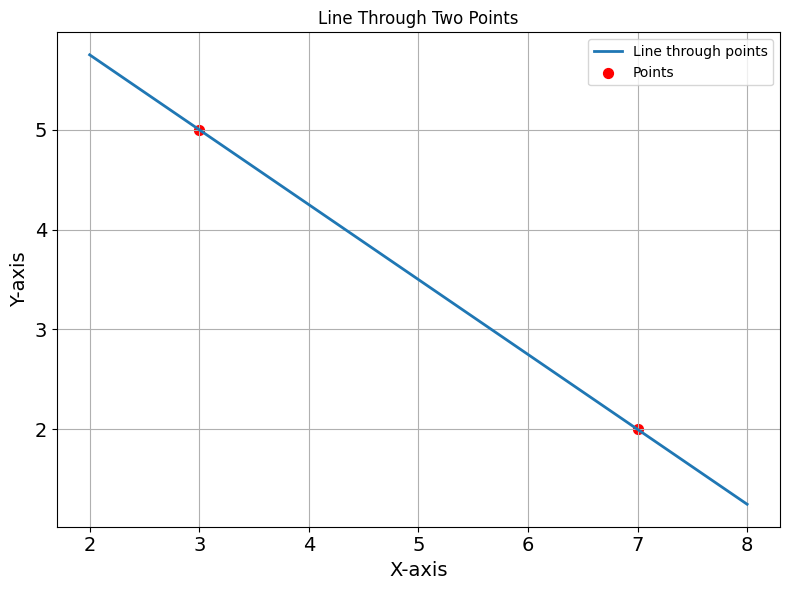

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Define the points
x1, y1 = 3, 5
x2, y2 = 7, 2

# Calculate the slope and intercept of the line
slope = (y2 - y1) / (x2 - x1)
intercept = y1 - slope * x1

# Generate x values for the line
x_line = np.linspace(min(x1, x2) - 1, max(x1, x2) + 1, 100)

# Calculate y values for the line
y_line = slope * x_line + intercept

# Plot the points and the line
plt.figure(figsize=(8, 6))
plt.plot(x_line, y_line, label='Line through points',
         linewidth=2)  # Increase line thickness
plt.scatter([x1, x2], [y1, y2], color='red',
            label='Points', s=50)  # Increase point size
plt.title('Line Through Two Points')
plt.xlabel('X-axis', fontsize=14)  # Set font size for axis labels
plt.ylabel('Y-axis', fontsize=14)
plt.xticks(fontsize=14)  # Set font size for tic marks
plt.yticks(fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()  # Ensure labels do not get cut off
plt.show()

Problem 2:

Load data from the following parquet file (URL below) into Python. Make nice plots presenting the data as fully as possible. 

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load parquet data ("https://star.herts.ac.uk/~kuhn/DHV/exercises_problem2.parquet")
df = pd.read_parquet("https://star.herts.ac.uk/~kuhn/DHV/exercises_problem2.parquet")

# Display information about the dataset
print(df.head())
print("Column names:", df.columns)

       var1      var2      var3  class
0  2.220386  3.088938  5.309324      1
1 -1.112359  1.838144  0.725785      0
2 -0.687695  1.747231  1.059535      0
3 -2.875016  1.718303 -1.156714      0
4 -2.010930  1.327895 -0.683035      0
Column names: Index(['var1', 'var2', 'var3', 'class'], dtype='object')


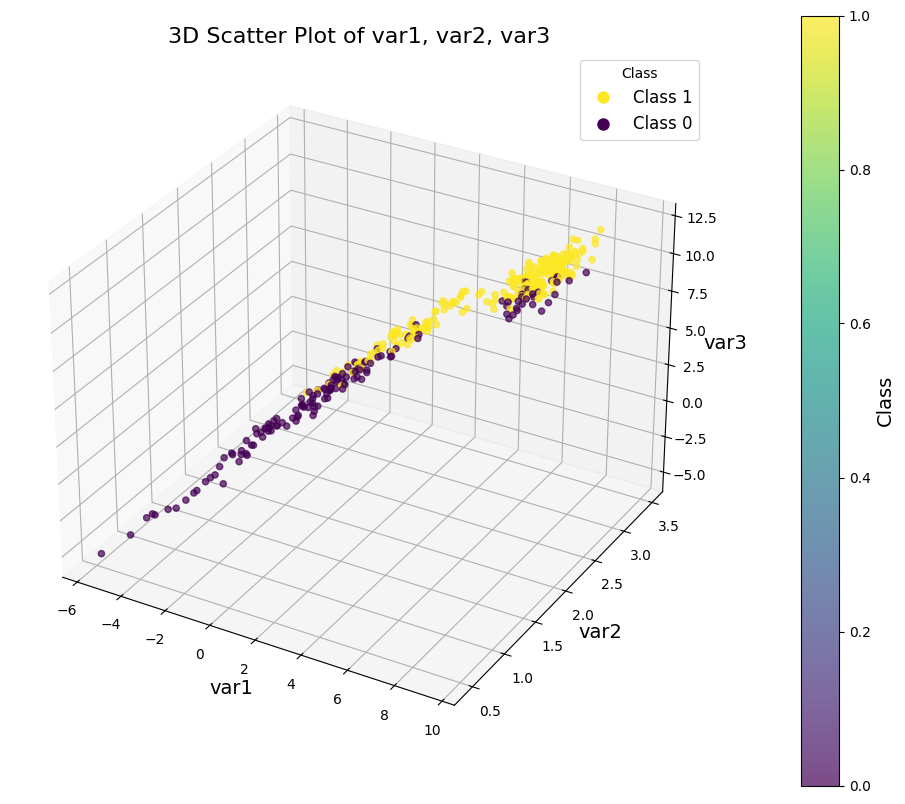

In [31]:
# Column names in the data set using the above output
column1_name = df.columns[0]
column2_name = df.columns[1]
column3_name = df.columns[2]

# Creating a 3D scatter plot using the three columns in the data set and class
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on the 'class' column
sc = ax.scatter(df[column1_name], df[column2_name], df[column3_name],
                c=df['class'], cmap='viridis', alpha=0.7, label='Scatter Plot')

# Set labels for each axis
ax.set_xlabel(column1_name, fontsize=14)
ax.set_ylabel(column2_name, fontsize=14)
ax.set_zlabel(column3_name, fontsize=14)

# Set title for the plot
ax.set_title('3D Scatter Plot of var1, var2, var3', fontsize=16)

# Create legend for different classes
legend_labels = {0: 'Class 0', 1: 'Class 1'}
classes = df['class'].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sc.cmap(sc.norm(c)), markersize=10, label=legend_labels[c]) for c in classes]
ax.legend(handles=handles, title='Class', fontsize=12)

# Adding colorbar
cb = fig.colorbar(sc, pad=0.1)
cb.set_label('Class', fontsize=14)

plt.show()
